# 1 神经网络
再次处理手写数字数据集。这次使用反向传播的前馈神经网络，自动学习神经网络的参数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat #使用模块scipy.io的函数loadmat和savemat可以实现Python对mat数据的读写
from sklearn.preprocessing import OneHotEncoder
#独热编码:用于将表示分类的数据扩维,分类编码变量，将每个类可能取值的特征变换为二进制特征向量，每一类特征向量只有一个地方是1，其余位置都是0

In [2]:
data=loadmat('Coursera-ML-using-matlab-python-master\ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = data['X']
y = data['y']

X.shape, y.shape #5000个训练样本

((5000, 400), (5000, 1))

In [4]:
weight = loadmat("Coursera-ML-using-matlab-python-master\ex3weights.mat")
theta1, theta2 = weight['Theta1'], weight['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

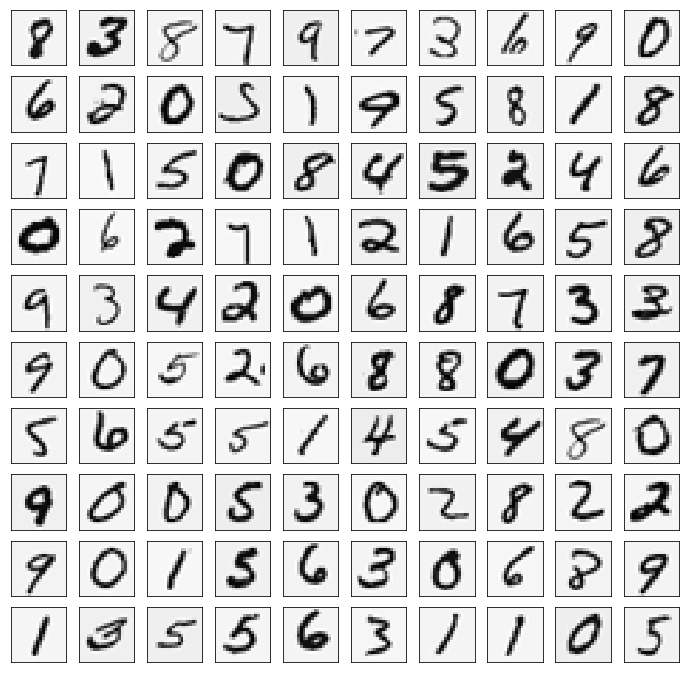

In [5]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx, :]
fig,ax_array=plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(12,12)) #设为True或‘all’时，所有子图共享 x 轴或者 y 轴
for r in range(10):
    for c in range(10):
        ax_array[r,c].matshow(np.array(sample_images[10*r+c].reshape((20,20))).T,cmap=matplotlib.cm.binary) #取1-100的所有图片
        plt.xticks(np.array([])) #x轴的刻度(tick)内容的范围
        plt.yticks(np.array([])) #去除刻度，美观

#### 前向传播和代价函数
首先，实现神经网络的代价函数和梯度函数
要求：代码应该适用于任何数据集，包括任意数量的输入输出单元

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# 前向传播函数
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1) #注意插入零元素
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1) #注意插入零元素
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [8]:
def cost(theta1, theta2 , input_size, hidden_size, num_labels, X, y, learning_rate):
# 神经网络参数，输入层维度，隐藏层维度，训练数据及标签，正则化参数
   
    m = len(X) #获取样本个数
    X = np.matrix(X)#将矩阵X,y转换为numpy型矩阵
    y = np.matrix(y)

    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2) #得到前向传播返回值
    
    J = 0 #cost
    for i in range(m):  #遍历每个样本
        first_term = np.multiply(- y[i,:],np.log(h[i,:])) 
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    J = J / m
    
    #J += sum([i*i for i in params])*lamda/(2*m)
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2))) #正则化部分
    
    return J

In [9]:
#独热编码:用于将表示分类的数据扩维，将每一个类可能取值的特征变换为二进制特征向量，每一类的特征向量只有一个地方是1，其余位置都是0
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape,y[0], y_onehot[0,:] # y0是数字0

((5000, 10),
 array([10], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [10]:
# 初始化设置
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1
cost(theta1, theta2, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

0.38376985909092354

In [11]:
# 初始化设置
input_size = 400
hidden_size = 25
num_labels = 10
lamda = 1
 
# 随机初始化完整网络参数大小的参数数组
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25
 
m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)
 
# 将参数数组解开为每个层的参数矩阵
theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
 
params.shape,theta1.shape, theta2.shape,X.shape,y.shape

((10285,), (25, 401), (10, 26), (5000, 400), (5000, 1))

#### 2 反向传播
这一部分需要实现反向传播的算法，来计算神经网络代价函数的梯度。获得了梯度的数据，就可以使用工具库来计算代价函数的最小值。
反向传播的步骤是，给定训练集，先计算正向传播，再对于l层的每个节点j，计算误差项δ，这个数据衡量这个节点对最后输出的误差“贡献”了多少。
对于每个输出节点，我们可以直接计算输出值与目标值的差值，定义为δ。对于每个隐藏节点，需要基于现有权重及（l+1）层的误差，计算δ

In [12]:
#实现sigmoid函数的梯度
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))
sigmoid_gradient(0)

0.25

In [13]:
#随机初始：当我们训练神经网络的时候，需要将设定θ的随机初始值，此处我们设定(-0.12,0.12)，这个范围保证了参数足够小，使参数学习更高效
#np.random.random(size) 返回size大小的0-1随机浮点数
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.24

In [14]:

def backpropReg(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 从params中获取神经网络参数，并按照输入层维度和隐藏层维度重新定义参数的维度
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # 前向传播
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # 初始化
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    J = J / m
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2))) #正则化
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # 梯度正则化项
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [15]:
from scipy.optimize import minimize

# minimize the objective function
fmin = minimize(fun=backpropReg, x0=(params), args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 250})
fmin

     fun: 0.3248285273568172
     jac: array([-1.06785941e-04,  1.78374521e-07,  4.40051105e-07, ...,
       -5.84885723e-05, -1.60413813e-05, -4.53168661e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 21
  status: 3
 success: False
       x: array([-6.31228535e-01,  8.91872603e-04,  2.20025552e-03, ...,
       -2.10326076e-01, -1.50895618e+00, -1.22614118e+00])

In [16]:
X = np.matrix(X)
thetafinal1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
thetafinal2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

# 计算使用优化后的θ得出的预测
a1, z2, a2, z3, h = forward_propagate(X, thetafinal1, thetafinal2 )
y_pred = np.array(np.argmax(h, axis=1) + 1)
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [17]:
# 预测值与实际值比较
from sklearn.metrics import classification_report#这个包是评价报告
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       500
           2       1.00      0.99      0.99       500
           3       0.99      0.98      0.99       500
           4       1.00      0.99      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       0.99      1.00      0.99       500
           8       0.99      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       0.99      1.00      0.99       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



#### 3 可视化隐藏层

In [18]:
hidden_layer = thetafinal1[:, 1:] 
hidden_layer.shape

(25, 400)

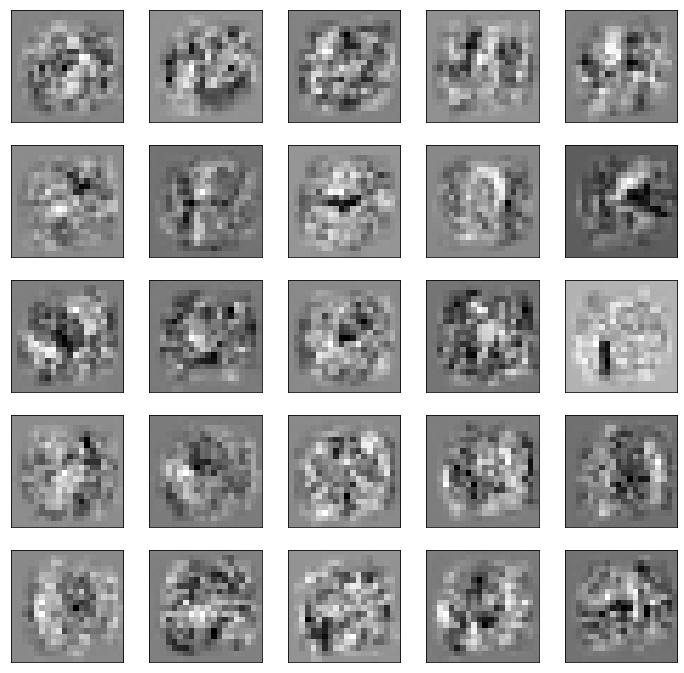

In [19]:
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(hidden_layer[5 * r + c].reshape((20, 20))),cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 